In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/data.csv')
data = data.fillna(0)
data.head(20)

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,19.0,0.42,False
2,I1,I,0,0.000000,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,0.000000,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,0.000000,0.000000,0.000000,0.000000e+00,0.0,19.0,0.42,False
5,P1,P,1,-0.001502,0.000000,-0.001502,2.000000e+07,1.0,19.0,0.42,False
6,P2,P,1,-0.001747,0.000000,-0.001747,2.000000e+07,1.0,19.0,0.42,False
7,I1,I,1,0.000000,0.002533,0.002533,4.024292e+07,1.0,19.0,0.42,False
8,I2,I,1,0.000000,0.001267,0.001267,3.666387e+07,1.0,19.0,0.42,False
9,I3,I,1,0.000000,0.000000,0.000000,0.000000e+00,0.0,19.0,0.42,False


In [3]:
p_data = data[data.group == 'P']
i_data = data[data.group == 'I']
p_data

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,19.0,0.42,False
5,P1,P,1,-0.001502,0.000000,-0.001502,20000000.0,1.0,19.0,0.42,False
6,P2,P,1,-0.001747,0.000000,-0.001747,20000000.0,1.0,19.0,0.42,False
10,P1,P,2,-0.001493,0.000000,-0.001493,20000000.0,1.0,19.0,0.42,False
...,...,...,...,...,...,...,...,...,...,...,...
28909,P2,P,27,-0.000251,-0.001899,-0.002150,20000000.0,1.0,0.0,0.00,True
28912,P1,P,28,-0.000359,-0.001302,-0.001661,20000000.0,1.0,0.0,0.00,True
28913,P2,P,28,-0.000240,-0.001902,-0.002143,20000000.0,1.0,0.0,0.00,True
28916,P1,P,29,-0.000345,-0.001319,-0.001665,20000000.0,1.0,0.0,0.00,True


In [4]:
not_baseline = p_data[~p_data.is_base].drop('is_base', axis=1).sort_values('date')
not_baseline

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef
0,P1,P,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42
15751,P2,P,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,2.0,0.58
15750,P1,P,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,2.0,0.58
15601,P2,P,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,5.0,0.58
15600,P1,P,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,5.0,0.58
...,...,...,...,...,...,...,...,...,...,...
18746,P2,P,29,-0.000253,-0.002979,-0.003232,20000000.0,1.0,11.0,0.50
18895,P1,P,29,-0.000386,-0.002089,-0.002475,20000000.0,1.0,16.0,0.50
18896,P2,P,29,-0.000267,-0.002980,-0.003248,20000000.0,1.0,16.0,0.50
18295,P1,P,29,-0.000420,-0.002052,-0.002472,20000000.0,1.0,21.0,0.50


In [5]:
not_baseline.columns

Index(['cat', 'group', 'date', 'oil', 'water', 'liquid', 'bhp', 'status',
       'start_lag', 'coef'],
      dtype='object')

In [8]:
baseline = p_data[p_data.is_base].drop('is_base', axis=1).sort_values('date')

60 rows baseline

In [6]:
from sklearn.model_selection import TimeSeriesSplit
 
tscv = TimeSeriesSplit(n_splits=5)

X = not_baseline.drop(['oil', 'water', 'liquid'], axis=1)
y = not_baseline[['oil']]

X.shape, y.shape

((11520, 7), (11520, 1))

In [7]:
X.columns

Index(['cat', 'group', 'date', 'bhp', 'status', 'start_lag', 'coef'], dtype='object')

In [11]:
# regressor that returns baseline values
class DummyRegressor():
    def __init__(self, baseline=None):
        self.baseline = baseline
    
    def fit(self, X, y):
        pass

    def predict(self, X: pd.DataFrame):
        preds = []
        for idx in X.index:
            cat, date  = X.loc[idx, ['cat', 'date']]
            base_oil = baseline[(baseline.cat == cat) & (baseline.date == date)].oil
            preds.append(base_oil.values[0])

        return np.array(preds)

In [18]:
def train_fn(data, model, horizon):    
    train = data[data.date < horizon]
    test = data[(data.date >= horizon) & (data.date < horizon + 3)]

    model.fit(X=train.drop(['oil', 'water', 'liquid'], axis=1), y=train.oil)
    y_pred = model.predict(test.drop(['oil', 'water', 'liquid'], axis=1))    
    return mean_absolute_percentage_error(test.oil, y_pred) * 100

def train_model(data, model, stride=1):    
    mapes = [train_fn(data, model, i) for i in range(2, 27, stride)]
    
    plt.bar(range(3, 28, stride), mapes)
    plt.title(f'MAPE for {model.__class__.__name__}, Mean = {np.mean(mapes):.2f}%')
    plt.xlabel('Horizon, day')
    plt.ylabel('MAPE, %')
    plt.show()
    return model

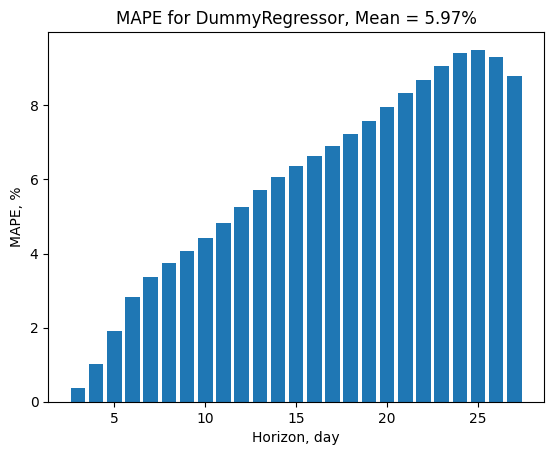

In [19]:
dr = DummyRegressor(baseline=baseline)

from sklearn.metrics import mean_absolute_percentage_error

train_model(not_baseline, dr, stride=1)